In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fetal_health.csv')

In [3]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
preds = model.predict(X_test)

In [5]:
import os
os.makedirs('figures', exist_ok=True)
os.makedirs('excel_files', exist_ok=True)

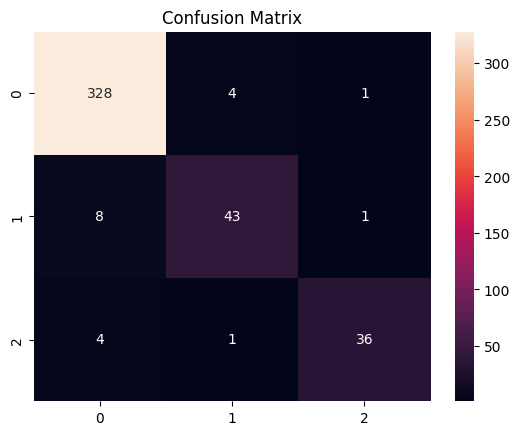

In [6]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.savefig('figures/fetal_cm.png')
plt.show()

In [7]:
with pd.ExcelWriter('excel_files/fetal_results.xlsx') as writer:
    pd.DataFrame({'Preds': preds, 'Actual': y_test}).to_excel(writer, sheet_name='Predictions')
    pd.DataFrame(cm).to_excel(writer, sheet_name='Confusion')